In [1]:
import tensorflow as tf

In [2]:
data_dir='./data'
batch_size = 32
image_size = (224, 224)
input_shape = tf.keras.Input(shape=(224, 224, 3))

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    labels="inferred",
    label_mode="categorical",
    image_size=image_size,
    batch_size=batch_size,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    labels="inferred",
    label_mode="categorical",
    image_size=image_size,
    batch_size=batch_size,
)

Found 2643 files belonging to 13 classes.
Using 2115 files for training.
Found 2643 files belonging to 13 classes.
Using 528 files for validation.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


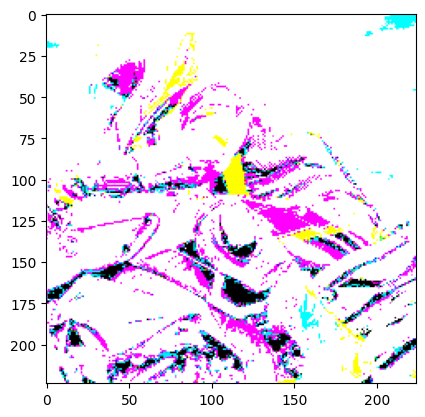

In [4]:
# Test Augmentations

def augment_images(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    # image = tf.image.random_brightness(image, 0.2)
    # image = tf.image.random_contrast(image, 0.5, 1.5)
    image = tf.image.random_saturation(image, 1.2, 1.8) # make colors more vibrant
    image = tf.image.random_hue(image, 0.5)
    # image = tf.image.random_resized_crop(image, size, scale=(0.08, 1.0), ratio=(0.75, 1.33), seed=None, name=None)
    return image, label

aug_ds = train_ds.map(augment_images, num_parallel_calls=tf.data.AUTOTUNE)


import random as rn
n = rn.randint(0, len(aug_ds))
image, label = next(iter(aug_ds.take(1)))
import matplotlib.pyplot as plt
plt.imshow(image[1])
plt.show()

train_ds = train_ds.map(augment_images, num_parallel_calls=tf.data.AUTOTUNE)

val_ds = val_ds.map(augment_images, num_parallel_calls=tf.data.AUTOTUNE)


In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Input, Activation, Dropout, Flatten, Dense

num_classes=13
inputs = Input(shape=(224,224,3))
models = []

#  Basic Model
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(num_classes, activation='softmax')(x)
basic_model = tf.keras.models.Model(inputs, outputs, name='basic_model')
models.append(basic_model)

# Model 2: Added 64 Convolution
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(num_classes, activation='softmax')(x)
model = tf.keras.models.Model(inputs, outputs, name='basic_model')
models.append(model)

# Model 2: Added Second 64 Convolution
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(num_classes, activation='softmax')(x)
model = tf.keras.models.Model(inputs, outputs, name='model2')
models.append(model)


# Model 3: Added 128 Convolution
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(num_classes, activation='softmax')(x)
model = tf.keras.models.Model(inputs, outputs, name='model3')
models.append(model)


# Model 4: Added Second 64 and 128 Convolution
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(num_classes, activation='softmax')(x)
model = tf.keras.models.Model(inputs, outputs, name='model4')
models.append(model)

# Model 5: Added Second 64 and Two 128 Convolutions
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(num_classes, activation='softmax')(x)
model = tf.keras.models.Model(inputs, outputs, name='model5')
models.append(model)


In [7]:
# Compile each of our models and fit them on the training data
import json
import multiprocessing

# optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) # default learning_rate=0.001

def train_model(model):
    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            self.model.save("./epochs/{}/{}_{}.h5".format(model.name, model.name, epoch))
            if logs.get('accuracy') is not None and logs.get('accuracy') > 0.999:
            
                #  stop when val accuracy starts to fall
                print("\nReached 99.9% accuracy so cancelling training!")
                self.model.stop_training = True
    model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

    callback = myCallback()

    history = model.fit(
        train_ds,
        epochs=50,
        validation_data=val_ds,
        callbacks=[callback])
    with open(f'./epochs/{model.name}/{model.name}-history.json', 'w') as f:
        json.dump(history.history, f)
        

[train_model(model) for model in models]
# with multiprocessing.Pool(processes=multiprocessing.cpu_count()) as pool:
#     pool.starmap(train_model, [(model) for model in models])



Epoch 1/50
67/67 [==============================] - 42s 599ms/step - loss: 2.5274 - accuracy: 0.1310 - val_loss: 2.5306 - val_accuracy: 0.1515
Epoch 2/50
67/67 [==============================] - 41s 600ms/step - loss: 2.4040 - accuracy: 0.2147 - val_loss: 2.5599 - val_accuracy: 0.1458
Epoch 3/50
67/67 [==============================] - 41s 601ms/step - loss: 2.2460 - accuracy: 0.2690 - val_loss: 2.4301 - val_accuracy: 0.2216
Epoch 4/50
67/67 [==============================] - 41s 598ms/step - loss: 2.0824 - accuracy: 0.3489 - val_loss: 2.4223 - val_accuracy: 0.2670
Epoch 5/50
67/67 [==============================] - 41s 601ms/step - loss: 1.9240 - accuracy: 0.3995 - val_loss: 2.4009 - val_accuracy: 0.2898
Epoch 6/50
67/67 [==============================] - 41s 602ms/step - loss: 1.7182 - accuracy: 0.4856 - val_loss: 2.4639 - val_accuracy: 0.2689
Epoch 7/50
67/67 [==============================] - 42s 609ms/step - loss: 1.5774 - accuracy: 0.5248 - val_loss: 2.3858 - val_accuracy: 0.3030

KeyboardInterrupt: 

In [169]:
import numpy as np


get_classes = tf.keras.preprocessing.image_dataset_from_directory(
    "./data/",
    label_mode='categorical',
    image_size=image_size,
    batch_size=batch_size)

dir2predict = rn.choice(get_classes.class_names)
print("class to predict: {}".format(dir2predict))

photos_ds = tf.keras.preprocessing.image_dataset_from_directory(
    f"./data/{dir2predict}/",
    label_mode=None,
    image_size=image_size,
    batch_size=batch_size)

model = tf.keras.models.load_model('./epochs/modelcp_19.h5')
# model.summary()
# Make predictions on the images in the dataset
predictions = model.predict(photos_ds)

class_indices = np.argmax(predictions, axis=-1)

class_labels = list(get_classes.class_names)

predicted_classes = [class_labels[index] for index in class_indices]
# print(predicted_classes)
x = [x for x in predicted_classes if dir2predict in x]
print(f'count adam: {len(x)}')
print(f'count total: {len(predicted_classes)}')
print(f'percent correct: {len(x)/len(predicted_classes)}')

Found 2643 files belonging to 13 classes.
class to predict: VIR_Patriot_Red_Ducati_05
Found 247 files belonging to 1 classes.
8/8 [==============================] - 1s 95ms/step
count adam: 176
count total: 247
percent correct: 0.7125506072874493
